In [1]:
import warnings

import dask
import ncar_jobqueue
import yaml

import utils

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
with open("diag_metadata.yaml", mode="r") as fptr:
    diag_metadata_list = yaml.safe_load(fptr)

In [3]:
def summary_plots(case, stream, diag_metadata):
    ds = case.history_contents[stream]
    varname = diag_metadata["varname"]
    print(varname)
    da = ds[varname].isel(diag_metadata.get("isel_dict"))

    utils.summary_plot_global_ts(ds, da, diag_metadata)

    utils.summary_plot_histogram(da, diag_metadata)

In [4]:
cluster = ncar_jobqueue.NCARCluster(
    cores=2, memory="64 GB", processes=2, walltime="6:00:00"
)
cluster.scale(n=8)  # n = number of workers
print(f"dashboard_link={cluster.dashboard_link}")

dashboard_link=https://jupyterhub.ucar.edu/dav/user/klindsay/proxy/8787/status


Datasets contain a total of 39 time samples
Last average written at 0004-04-01 00:00:00
POC_FLUX_100m


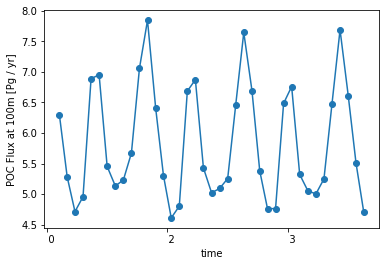

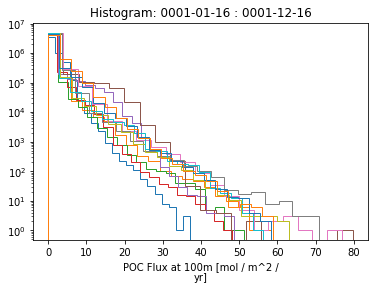

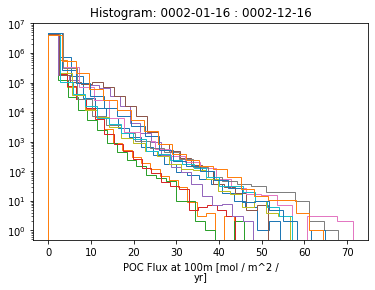

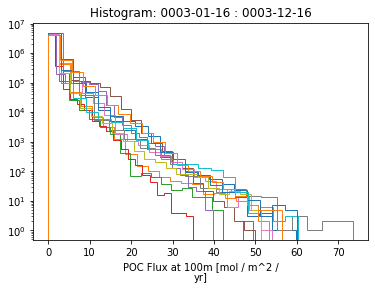

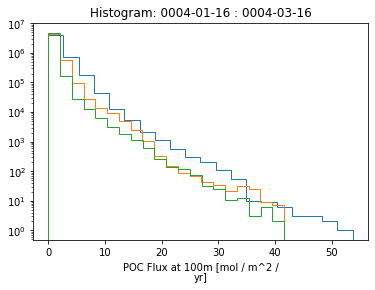

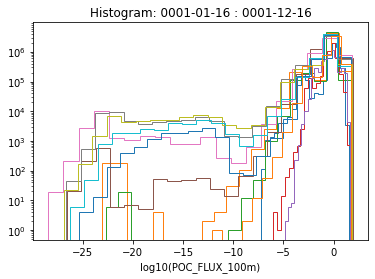

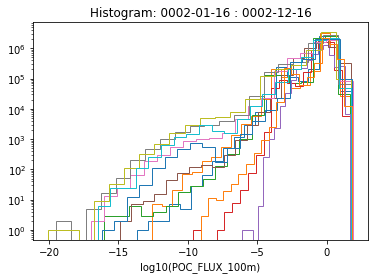

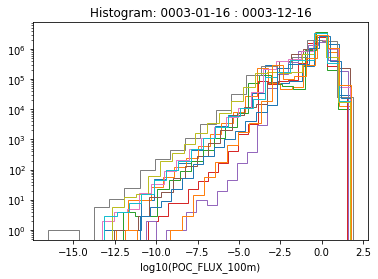

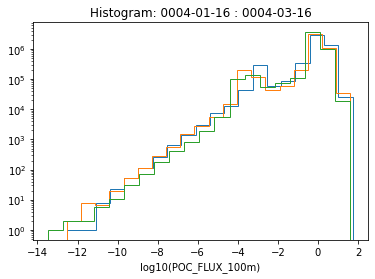

CaCO3_FLUX_100m


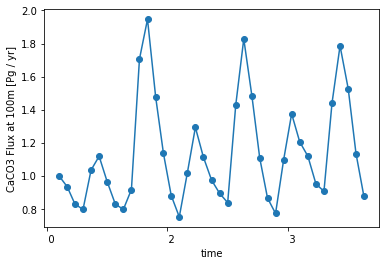

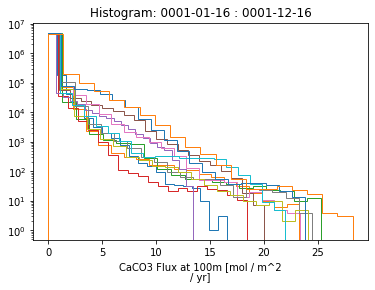

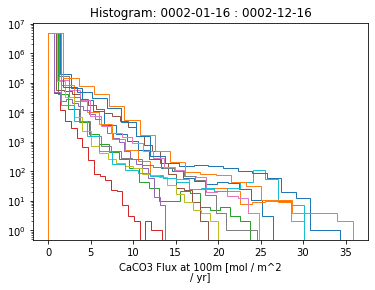

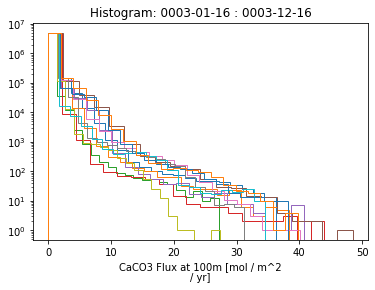

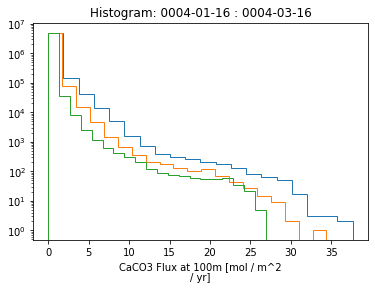

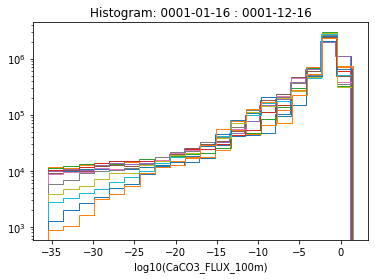

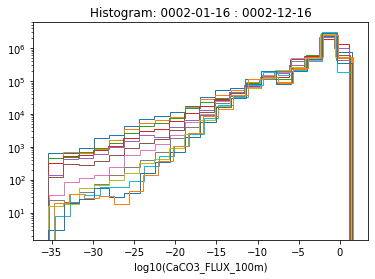

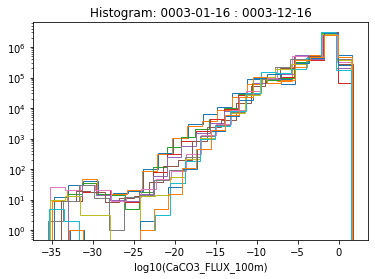

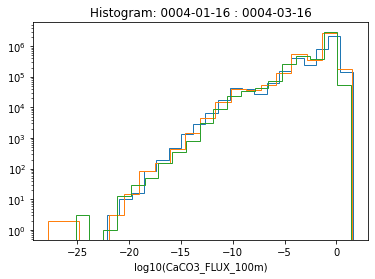

FG_CO2


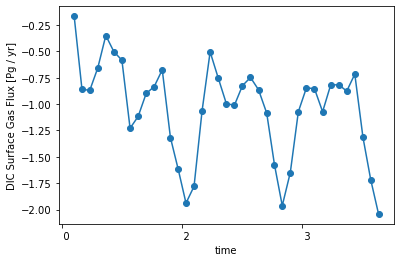

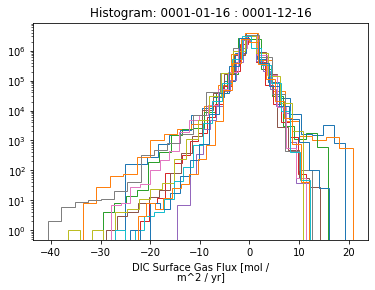

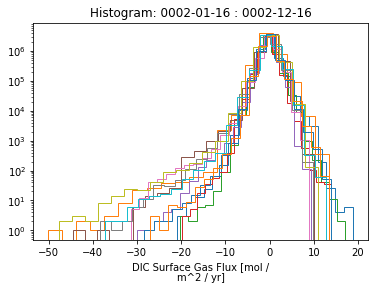

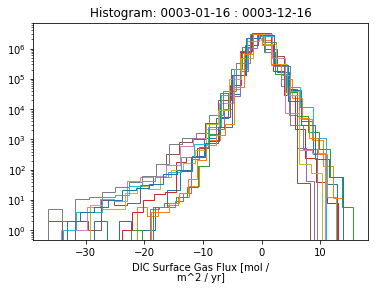

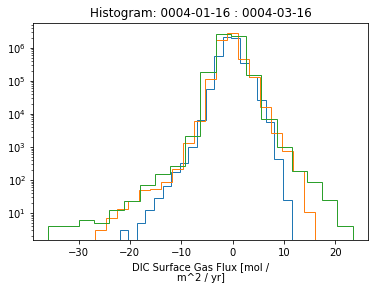

DpCO2


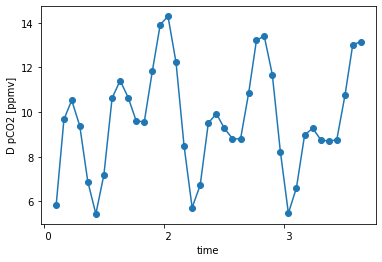

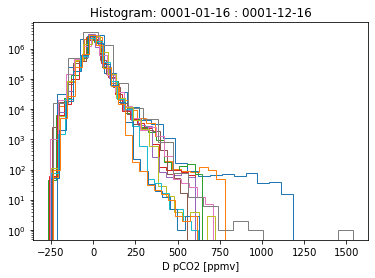

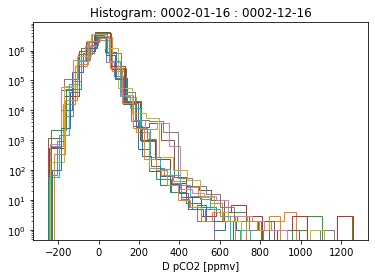

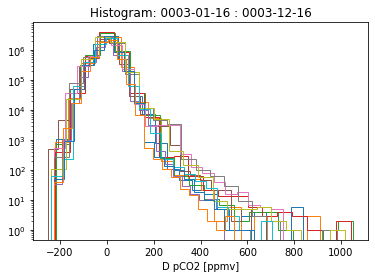

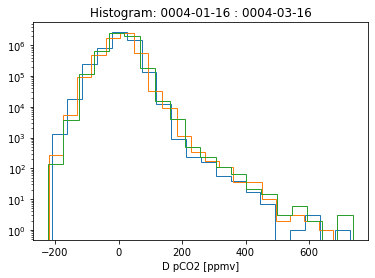

spChl


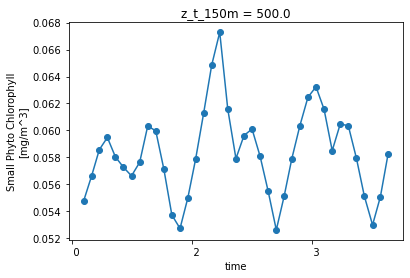

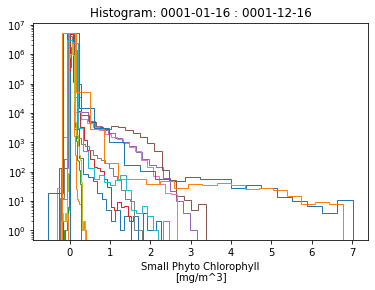

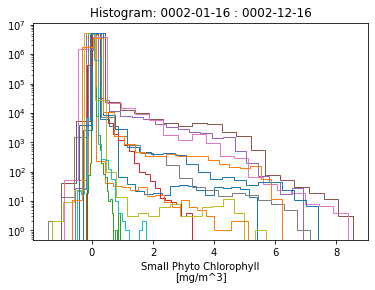

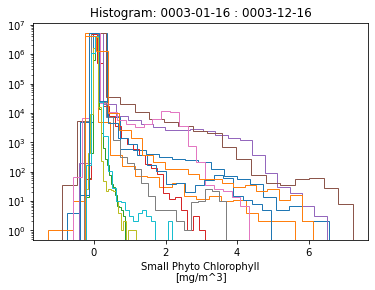

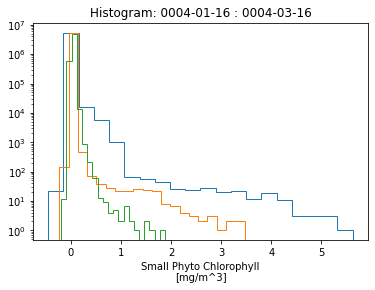

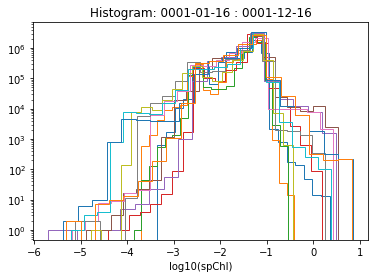

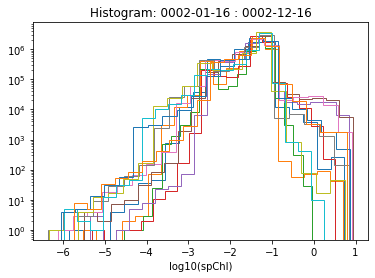

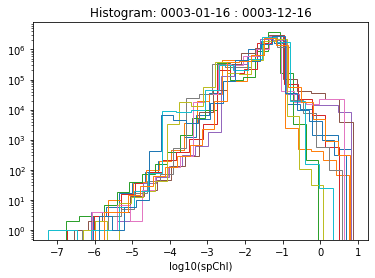

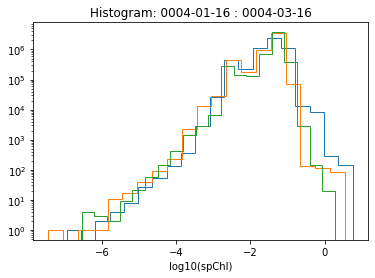

coccoChl


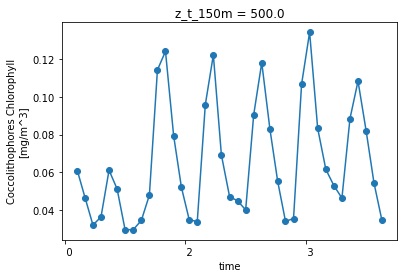

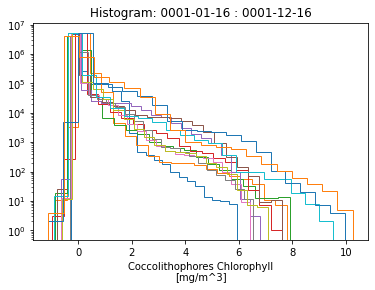

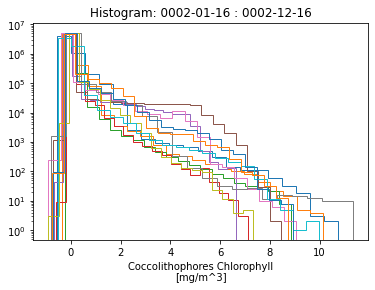

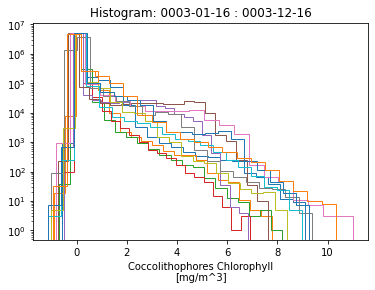

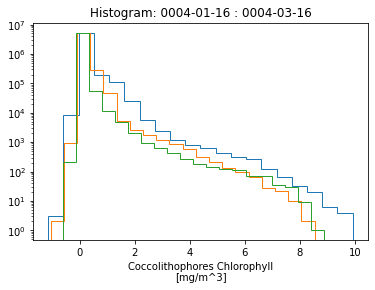

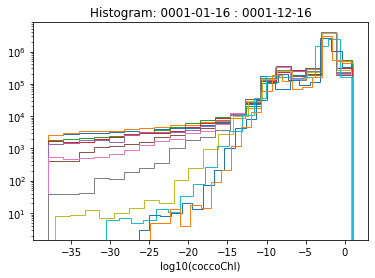

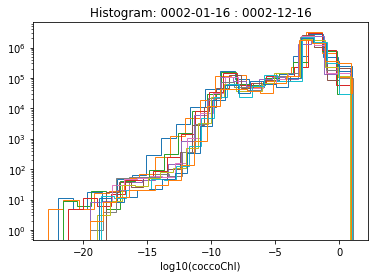

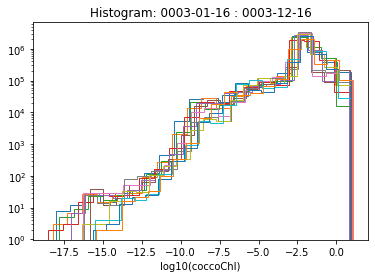

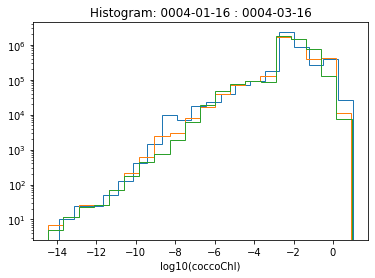

diatChl


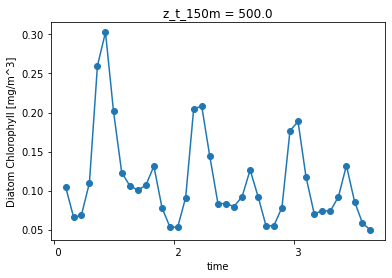

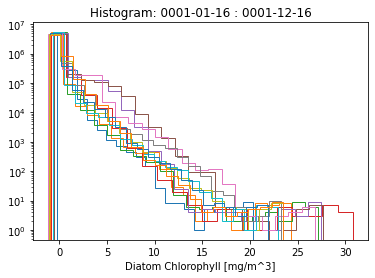

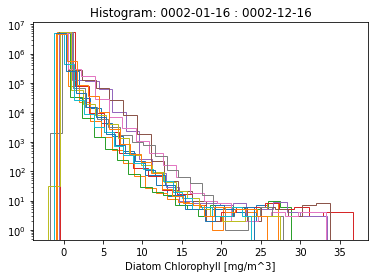

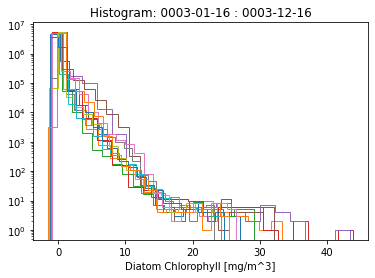

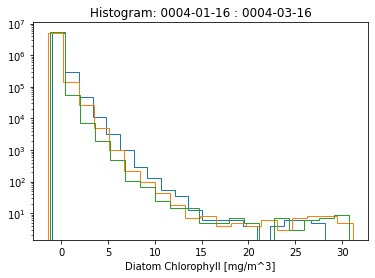

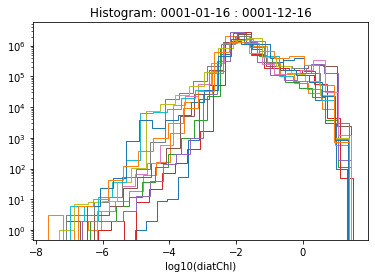

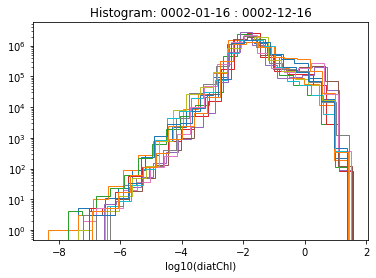

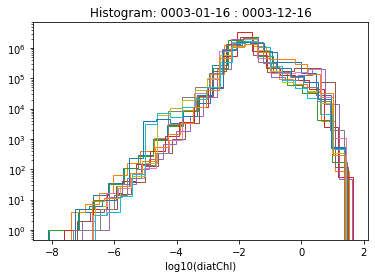

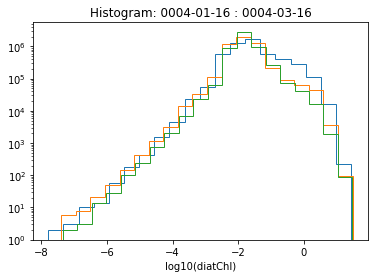

diazChl


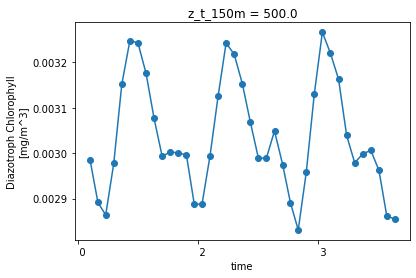

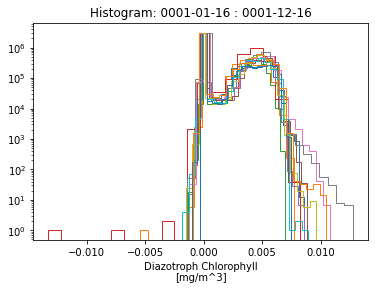

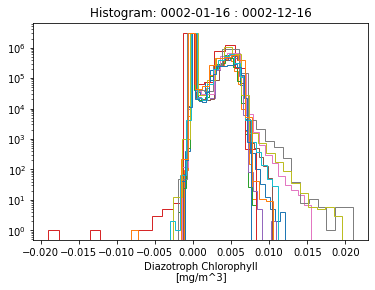

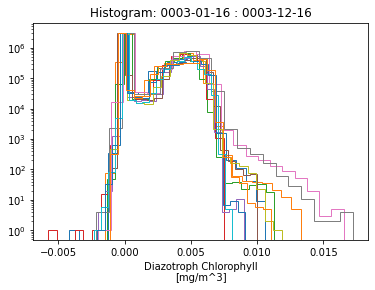

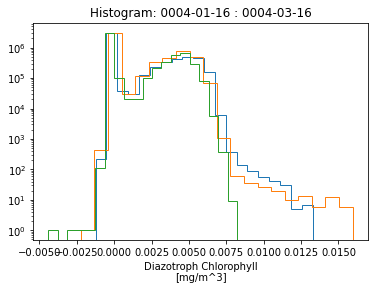

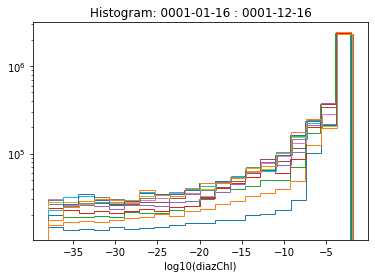

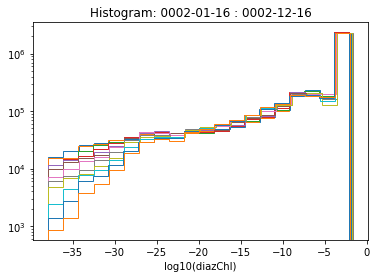

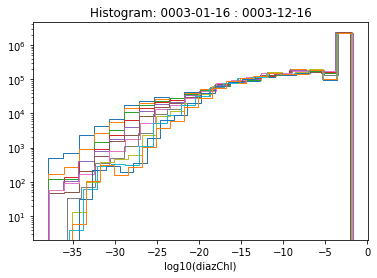

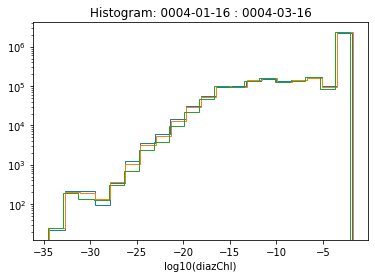

photoC_sp_zint


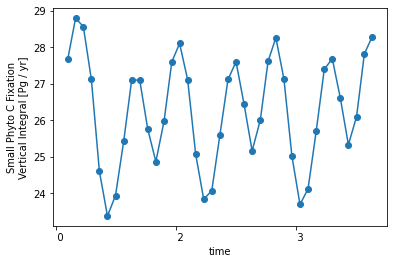

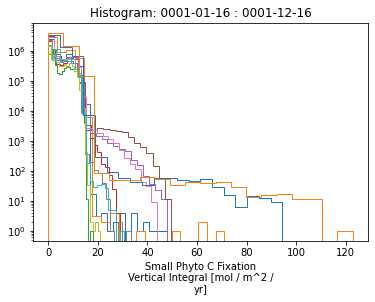

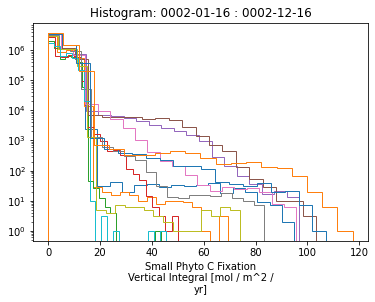

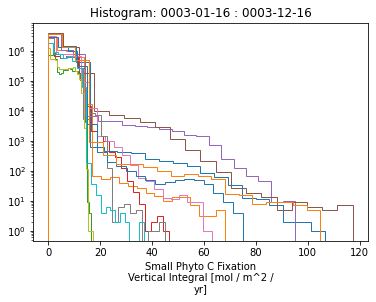

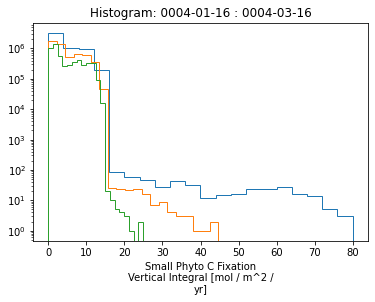

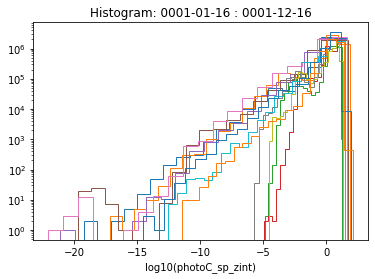

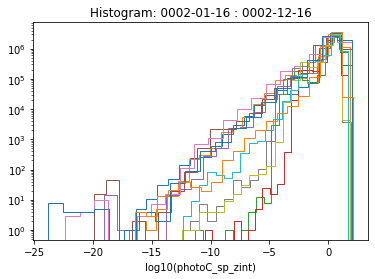

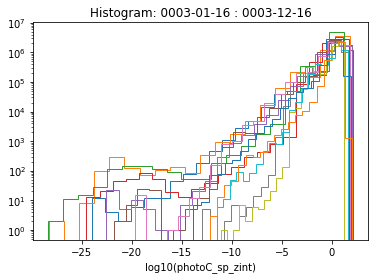

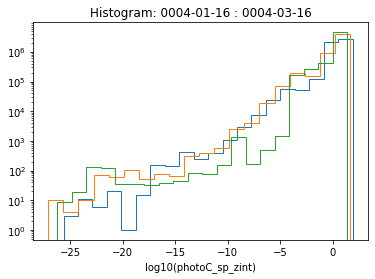

photoC_cocco_zint


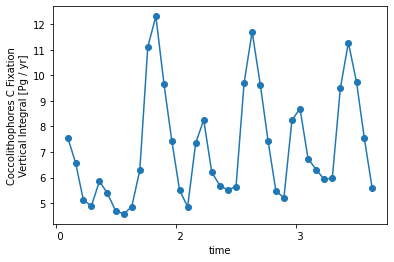

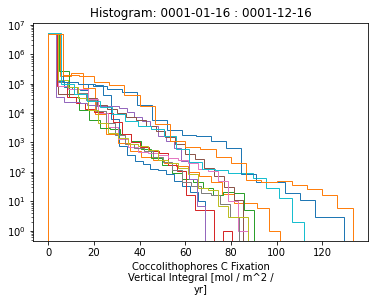

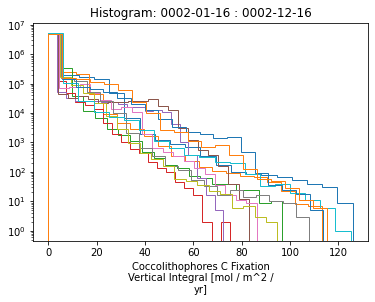

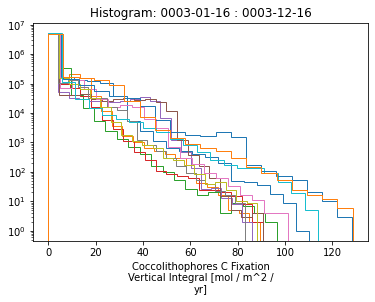

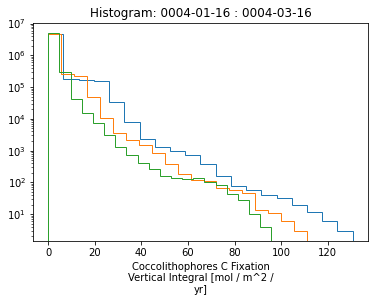

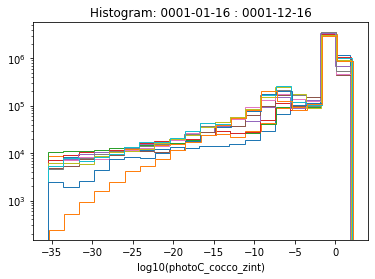

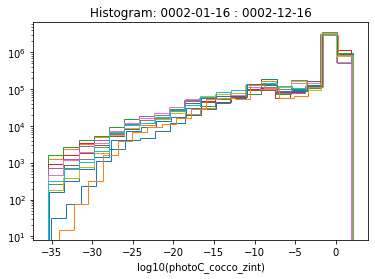

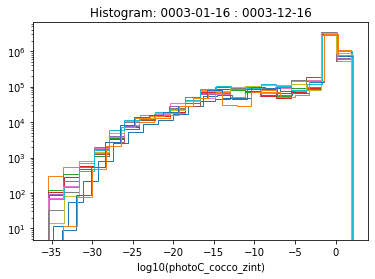

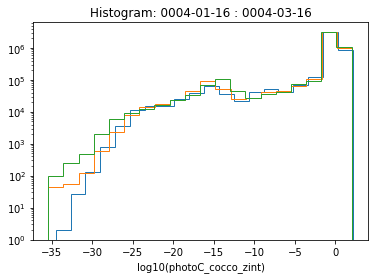

photoC_diat_zint


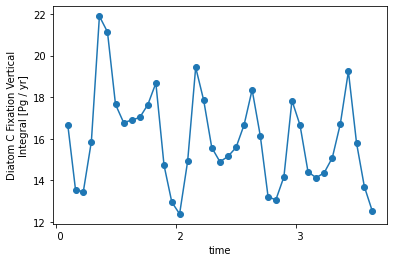

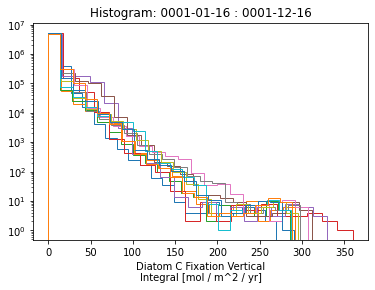

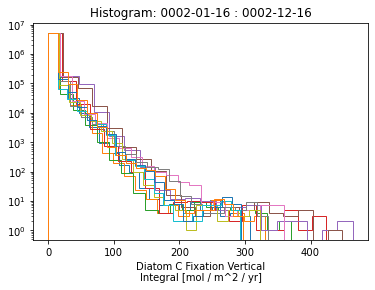

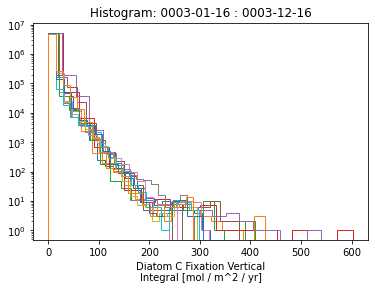

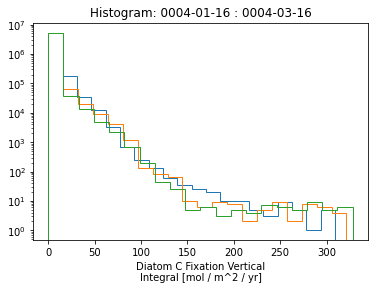

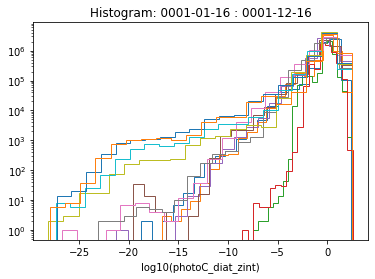

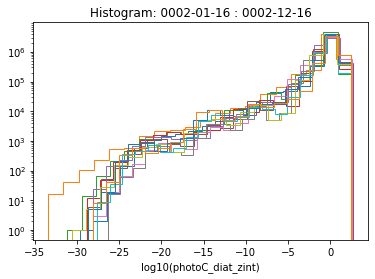

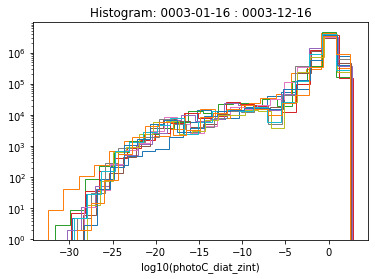

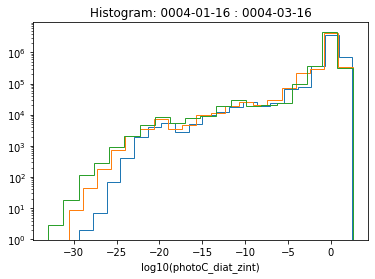

photoC_diaz_zint


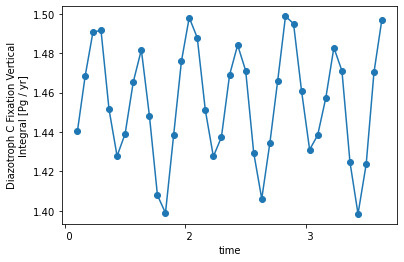

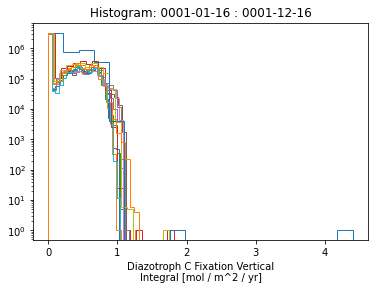

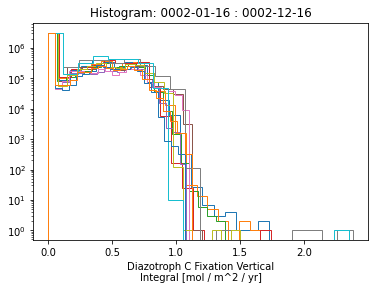

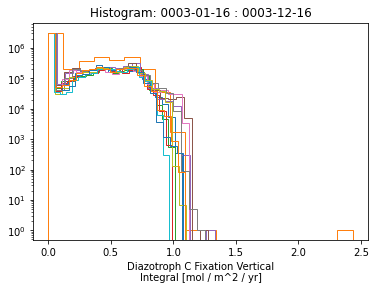

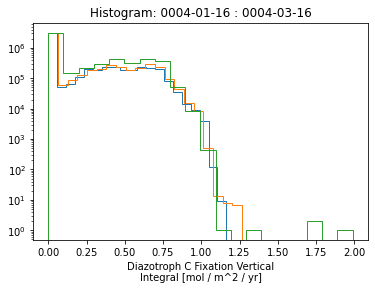

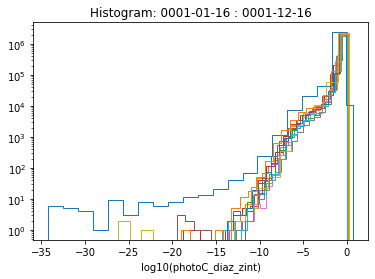

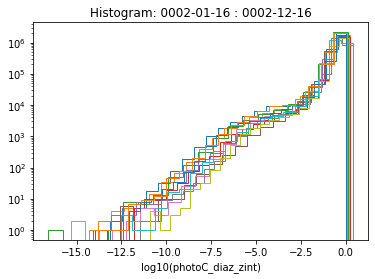

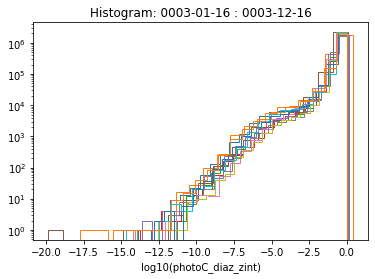

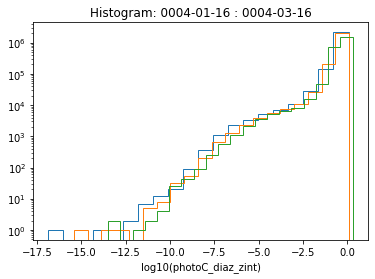

PH


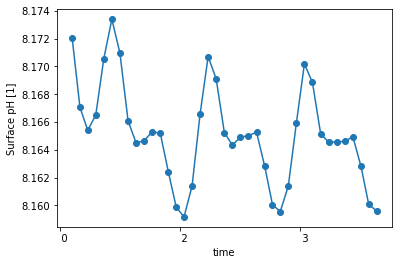

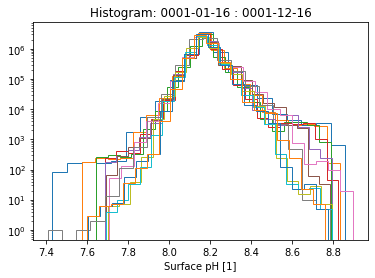

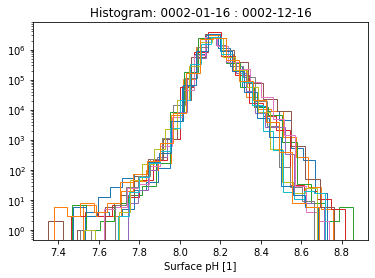

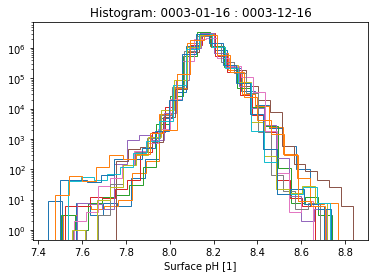

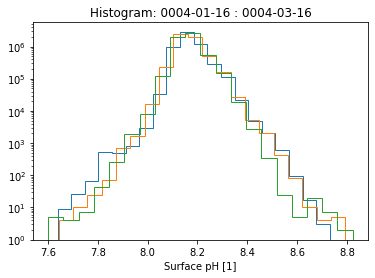

NHx_SURFACE_EMIS


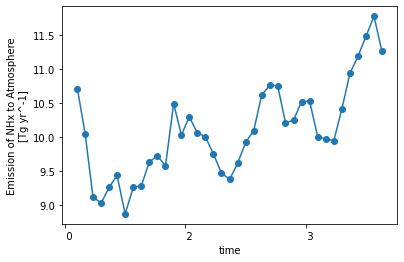

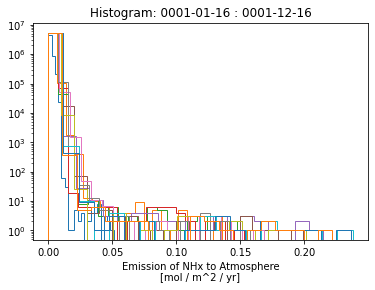

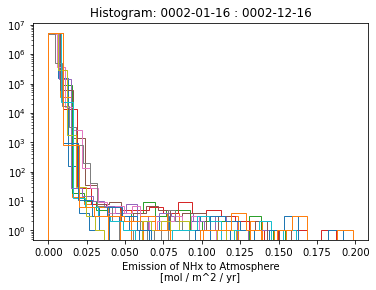

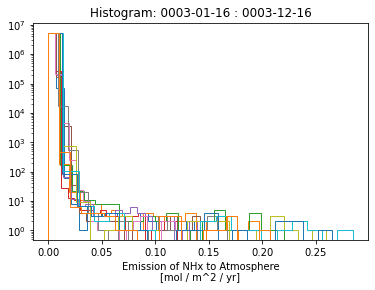

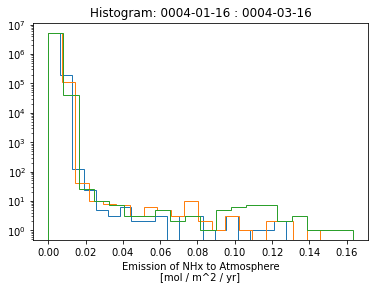

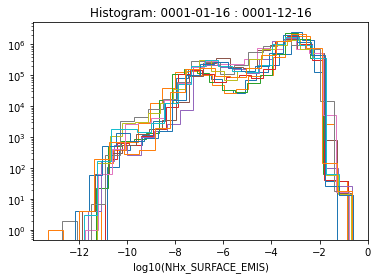

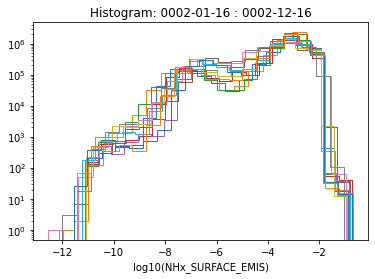

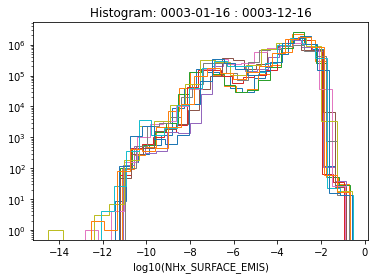

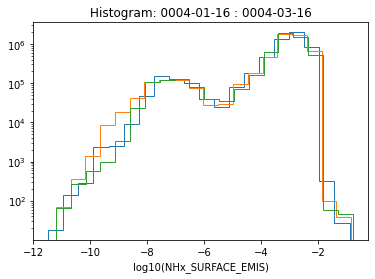

O2_ZMIN


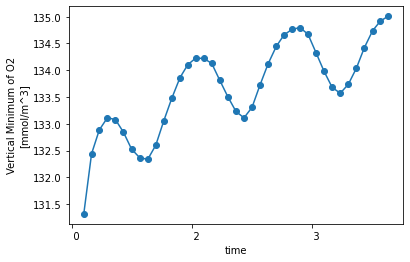

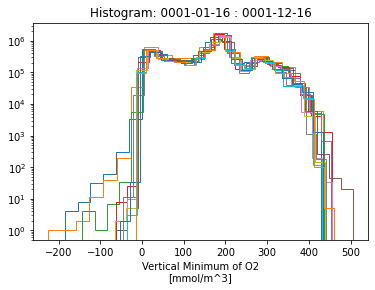

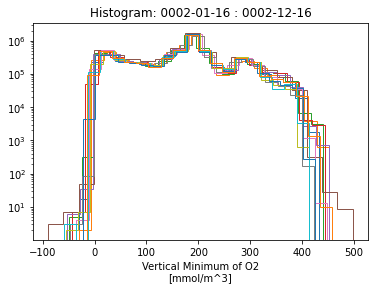

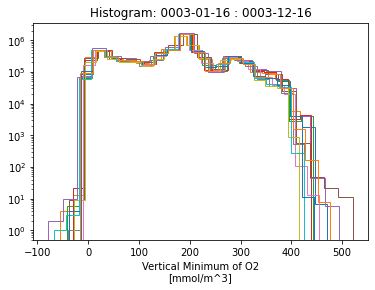

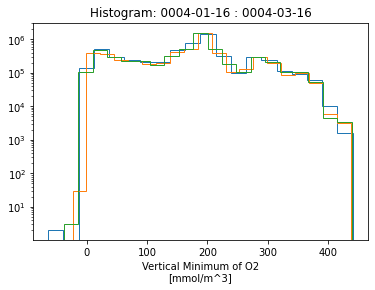

O2_ZMIN_DEPTH


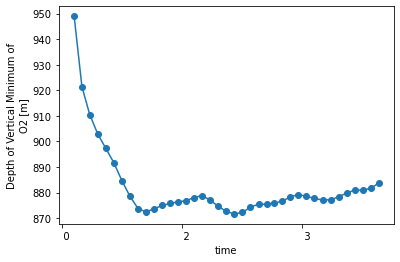

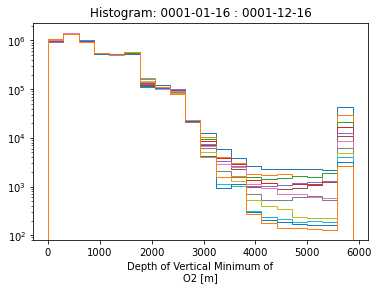

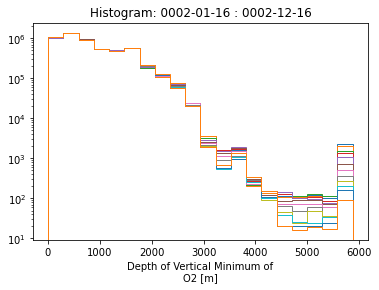

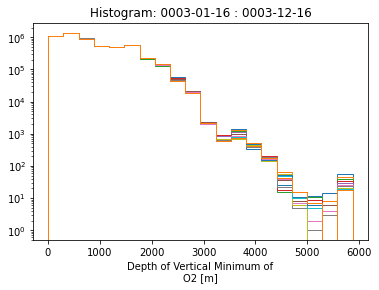

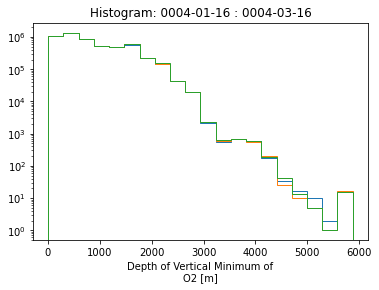

O2


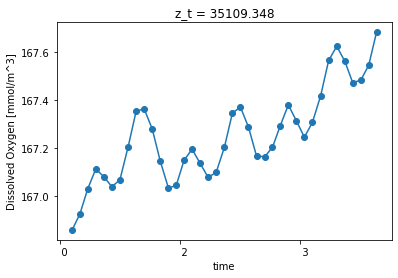

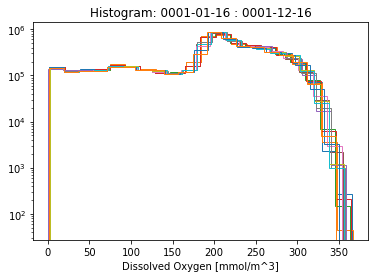

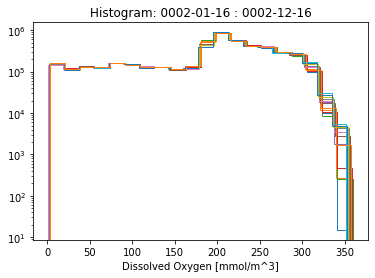

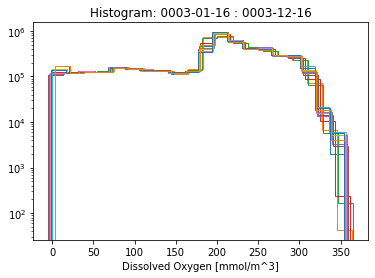

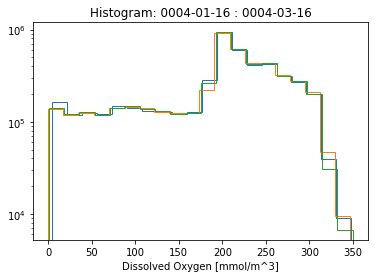

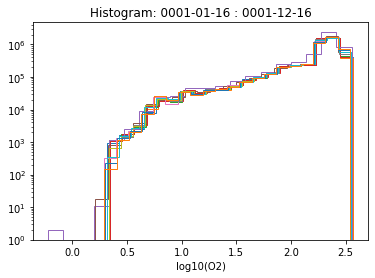

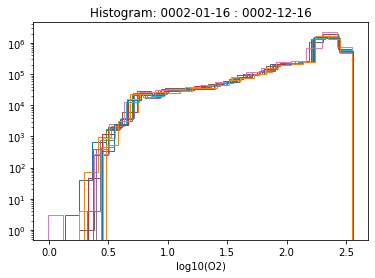

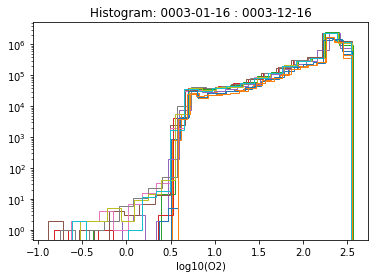

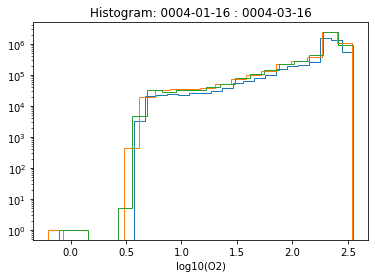

PO4


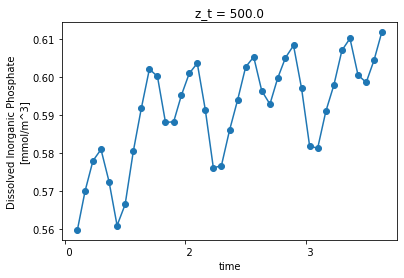

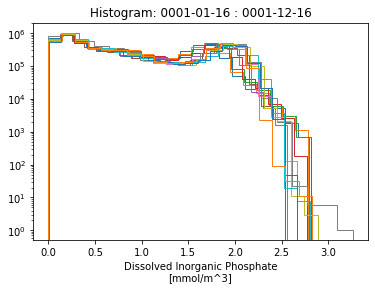

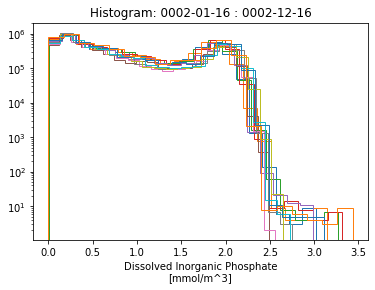

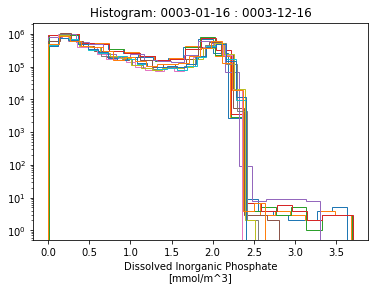

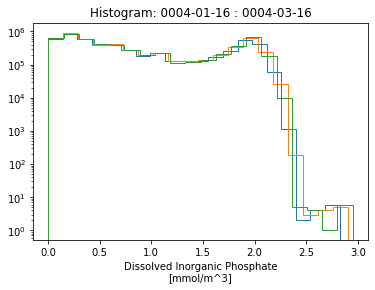

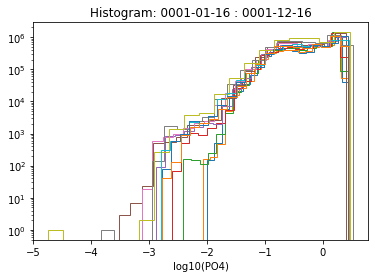

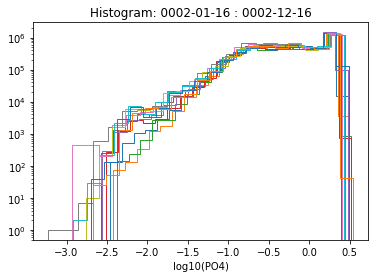

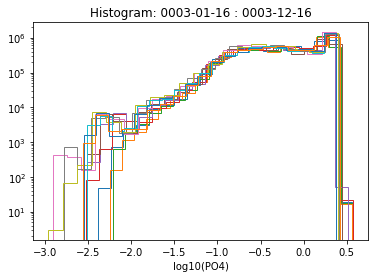

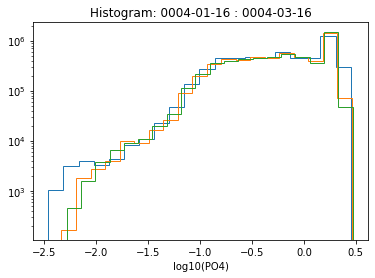

PO4


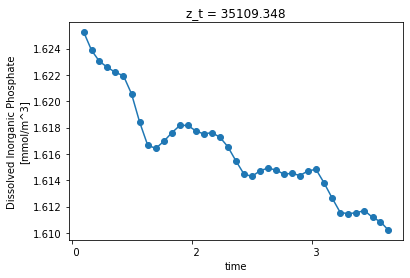

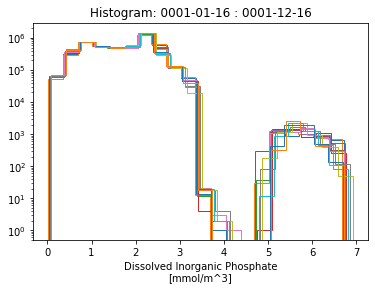

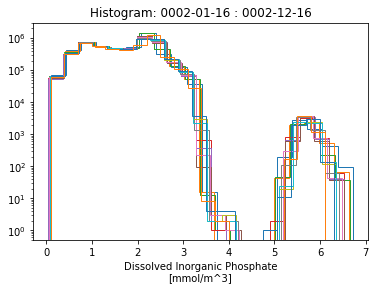

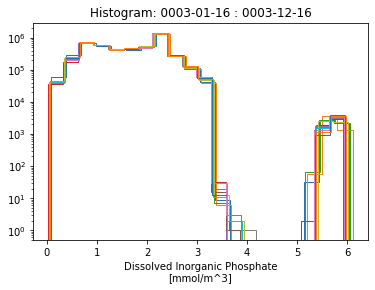

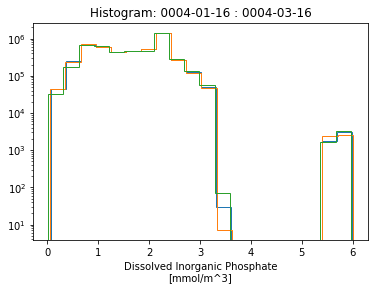

NO3


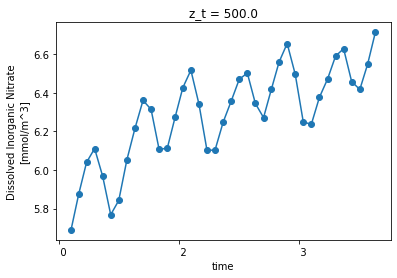

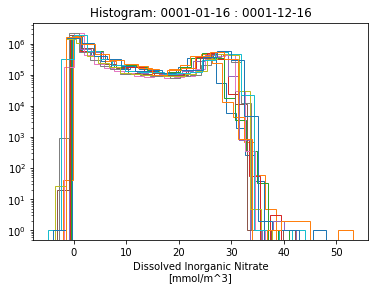

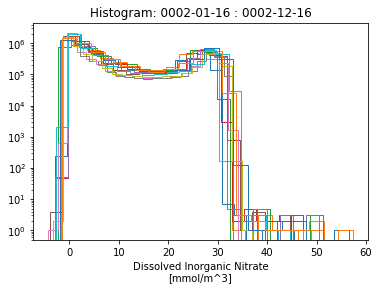

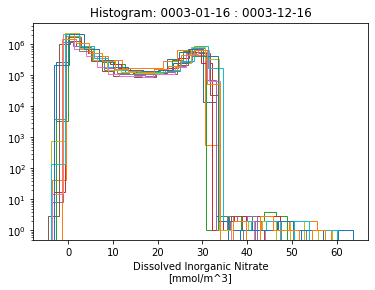

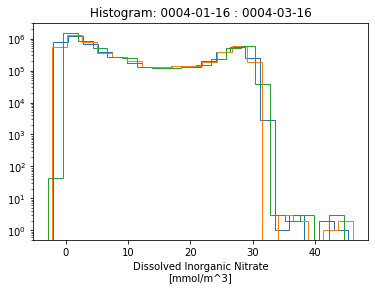

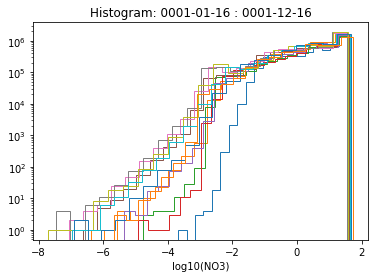

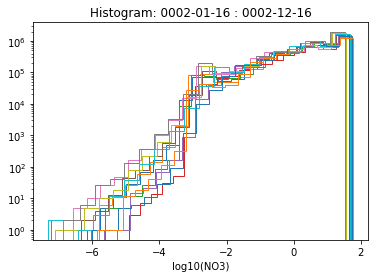

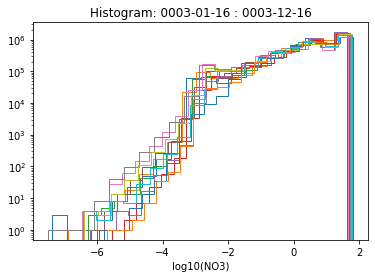

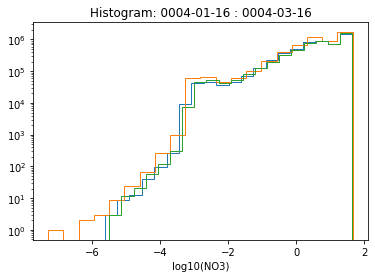

NO3


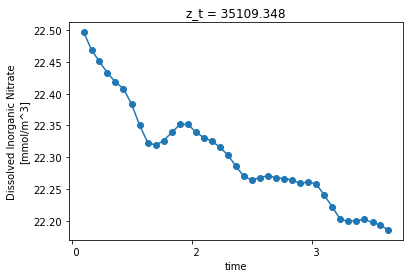

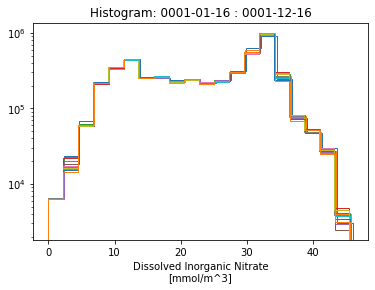

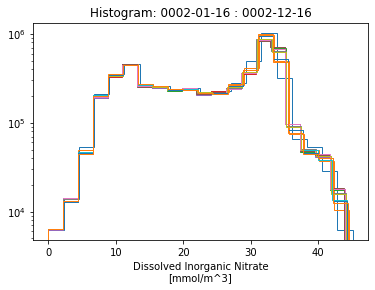

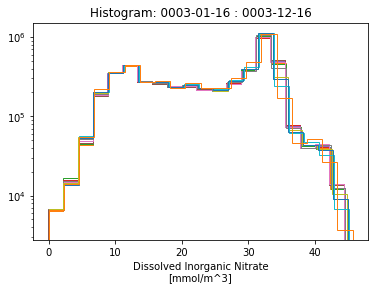

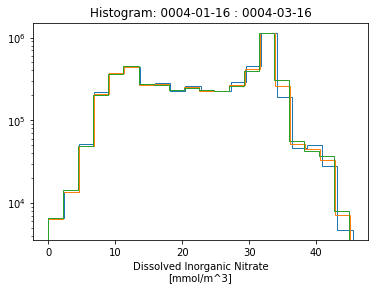

SiO3


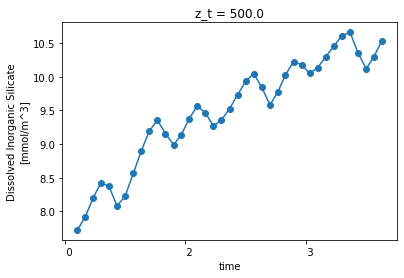

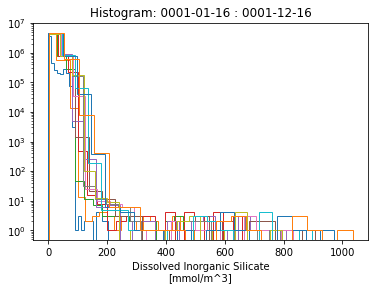

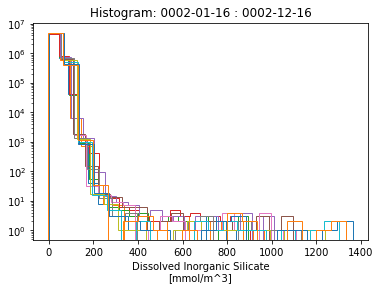

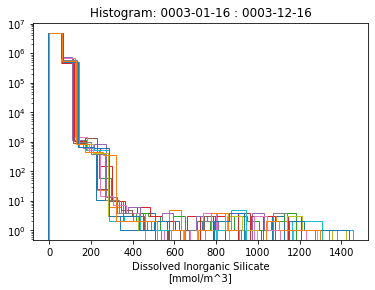

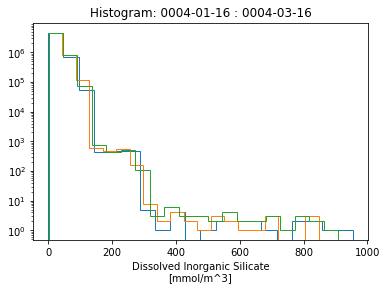

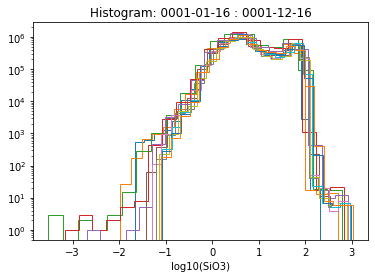

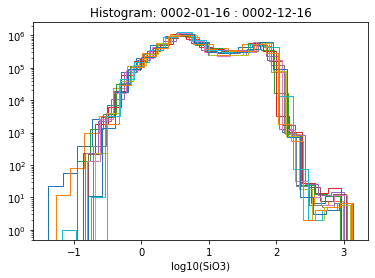

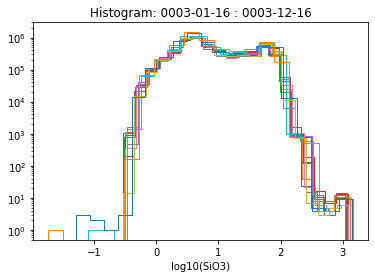

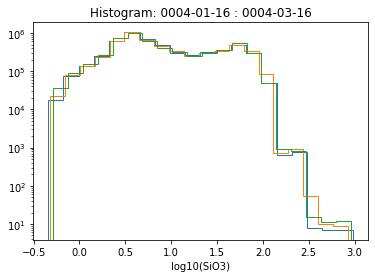

SiO3


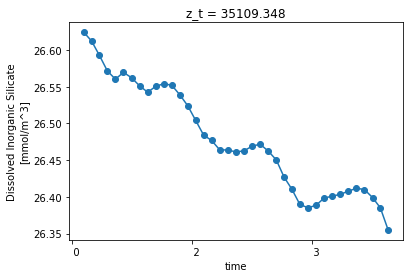

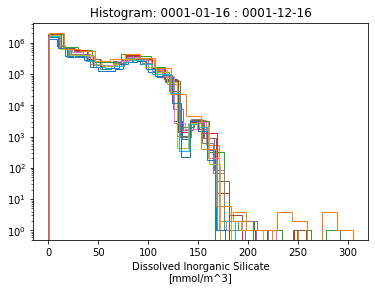

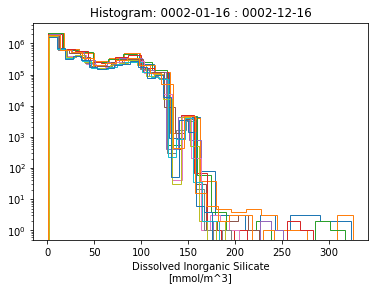

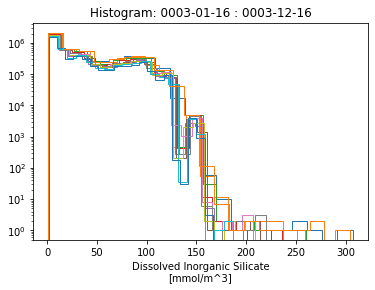

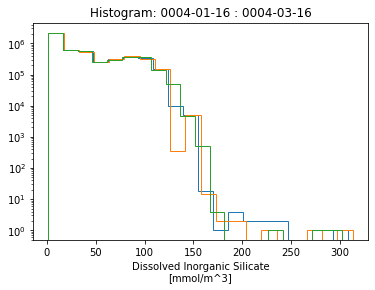

In [5]:
with dask.distributed.Client(cluster) as client:
    case = utils.CaseClass("g.e22.G1850ECO_JRA_HR.TL319_t13.003")
    stream = "pop.h"
    case._open_history_files(stream)
    for diag_metadata in diag_metadata_list:
        summary_plots(case, stream, diag_metadata)

In [6]:
cluster.close()